In [ ]:
!pip install ColorDetect
from colordetect import ColorDetect
from PIL import Image
import matplotlib.pyplot as plt
import webcolors

In [ ]:
import matplotlib.colors as mcolors
  
# helper function to plot a color table
def colortable(colors, title):
   
    width = 212
    height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40
   
    names = list(colors)
   
    length_of_names = len(names)
    length_cols = 1
    length_rows = length_of_names
   
    width2 = width * 2 + 2 * margin
    height2 = height * length_rows + margin + topmargin
    dpi = 72
   
    figure, axes = plt.subplots(figsize =(width2 / dpi, height2 / dpi), dpi = dpi)
    figure.subplots_adjust(margin / width2, margin / height2,
                        (width2-margin)/width2, (height2-topmargin)/height2)
      
    axes.set_xlim(0, width * 2)
    axes.set_ylim(height * (length_rows-0.5), -height / 2.)
    axes.set_axis_off()
    axes.set_title(title, fontsize = 24, loc ="left", pad = 10)
   
    for i, name in enumerate(names):
        rows = i % length_rows
        cols = i // length_rows
        y = rows * height
   
        swatch_start_x = width * cols
        swatch_end_x = width * cols + swatch_width
        text_pos_x = width * cols + swatch_width + 7
   
        axes.text(text_pos_x, y, name, fontsize = 14,
                horizontalalignment ='left',
                verticalalignment ='center')
   
        axes.hlines(y, swatch_start_x, swatch_end_x,
                  color = colors[name], linewidth = 18)
   
    plt.show()

In [ ]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return closest_name

rm: cannot remove 'Kuhnya_uglovaya_Alvic_glyanec_indigo_T_B_M_Luks_KUH0004_002.jpg': No such file or directory
--2021-04-13 13:50:43--  https://static.tbmmarket.com/risunok1280x1024/Kuhnya_uglovaya_Alvic_glyanec_indigo_T_B_M_Luks_KUH0004_002.jpg
Resolving static.tbmmarket.com (static.tbmmarket.com)... 91.213.184.176
Connecting to static.tbmmarket.com (static.tbmmarket.com)|91.213.184.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75657 (74K) [image/jpeg]
Saving to: ‘Kuhnya_uglovaya_Alvic_glyanec_indigo_T_B_M_Luks_KUH0004_002.jpg’

Kuhnya_uglovaya_Alv 100%[===================>]  73.88K   405KB/s    in 0.2s    

2021-04-13 13:50:44 (405 KB/s) - ‘Kuhnya_uglovaya_Alvic_glyanec_indigo_T_B_M_Luks_KUH0004_002.jpg’ saved [75657/75657]



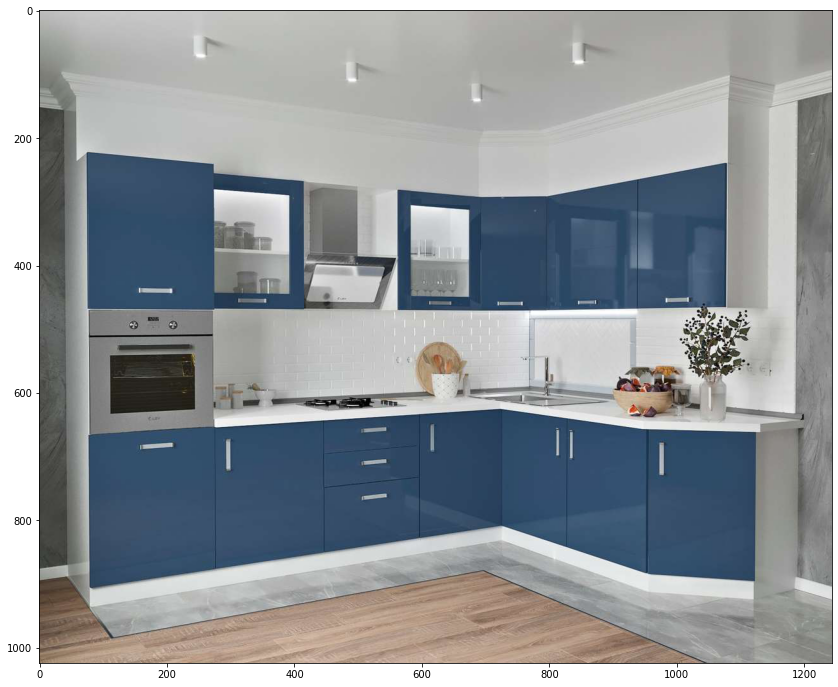

In [ ]:
!rm Kuhnya_uglovaya_Alvic_glyanec_indigo_T_B_M_Luks_KUH0004_002.jpg
!wget https://static.tbmmarket.com/risunok1280x1024/Kuhnya_uglovaya_Alvic_glyanec_indigo_T_B_M_Luks_KUH0004_002.jpg
jpg = 'Kuhnya_uglovaya_Alvic_glyanec_indigo_T_B_M_Luks_KUH0004_002.jpg'
img = Image.open(jpg)
plt.figure(figsize=(20, 12))
plt.imshow(img)

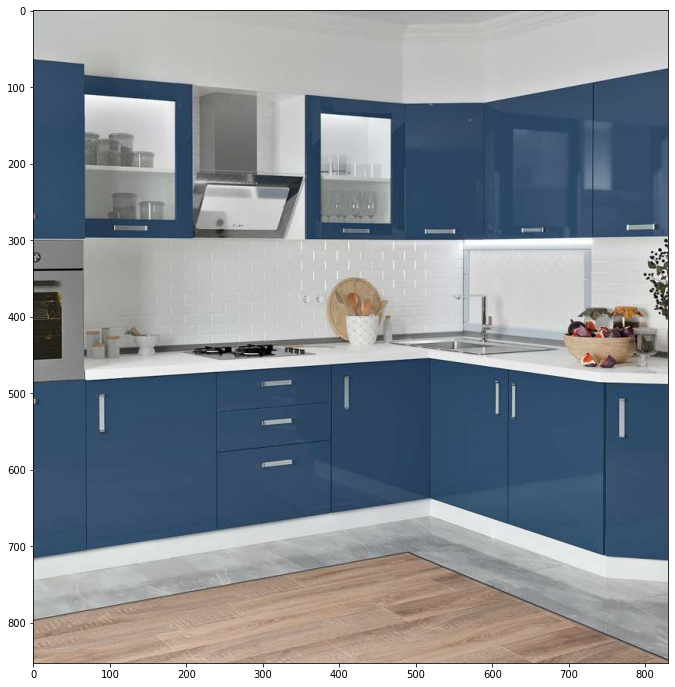

In [ ]:
width, height = img.size
left = width/6
top = height/6
right = width - width/6
bottom = height
img = img.crop((left, top, right, bottom))
img.save(jpg)
plt.figure(figsize=(20, 12))
plt.imshow(img)

In [ ]:
user_image = ColorDetect(jpg)
color_count = user_image.get_color_count(color_format="rgb")

{'[131.0, 124.0, 118.0]': 8.79,
 '[170.0, 157.0, 147.0]': 15.2,
 '[190.0, 190.0, 189.0]': 22.87,
 '[216.0, 218.0, 218.0]': 13.01,
 '[52.0, 75.0, 101.0]': 40.12}

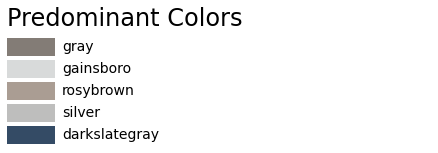

In [ ]:
colors = {}
for col in color_count.keys():
    rgb_str = col.strip('[]').split(',')
    rgb = []
    for s in rgb_str:
        rgb.append(int(float(s.strip())))
    rgb = tuple(rgb)
    colors[get_colour_name(rgb)] = tuple(map(lambda x: x/255, rgb))

colortable(colors, "Predominant Colors")